## Topic 2 - Visulaization

[](https://www.youtube.com/watch?v=WNoQTNOME5g&index=3&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)

### First Steps

Look at ur data overall using the following plots:

- corr matrix
- hists
- tSNE: projects data onto a lower dimension for intuitive analysis

Then explore the features one by one and see how they interact

Features may be of

- num

- cat

Intreactions can be of type

- num - num
- num - cat
- cat - cate



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

### Whole dataset visualizations

In [3]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})

df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].astype('int')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12857680b8>,
      dtype=object)

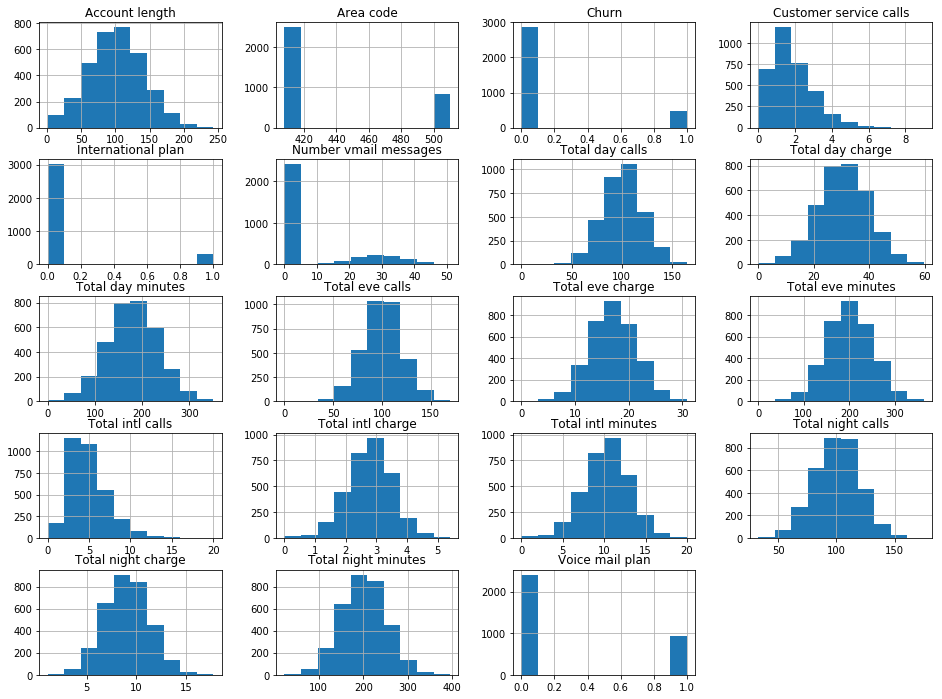

In [5]:
plt.rcParams['figure.figsize'] = (16, 12)
df.drop(['State'], axis=1).hist()

Numeric features are v close to Normal Dist

Customer service calls is a skewed dist

This plot is good for first look at dataset

#### Person Corr

In [6]:
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


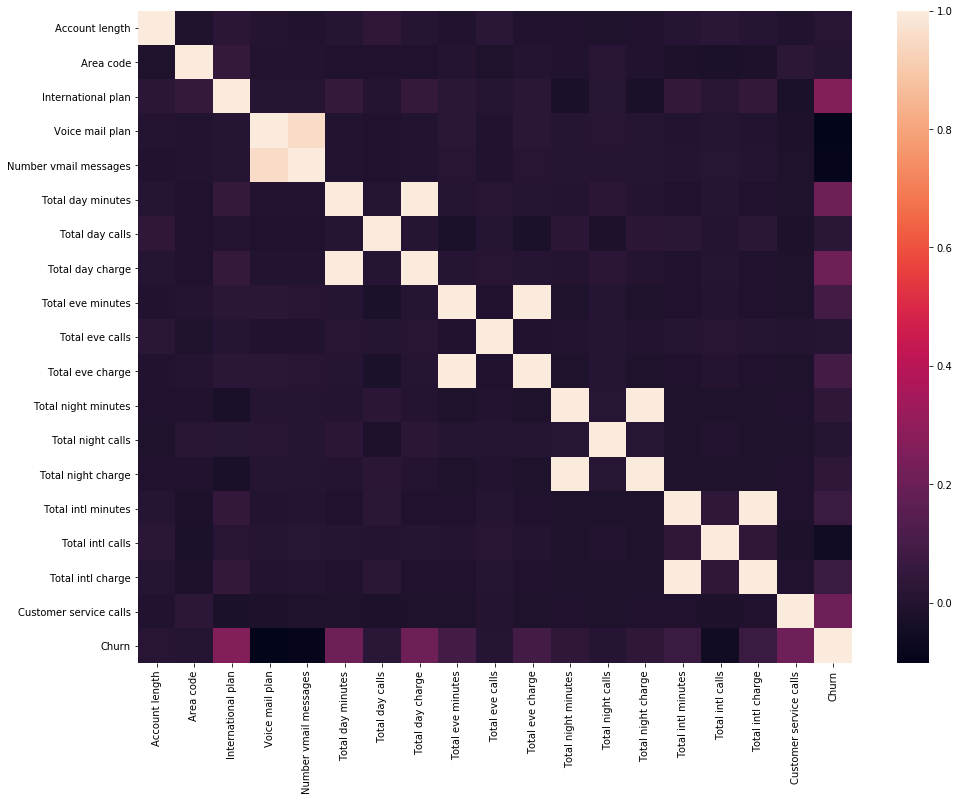

In [7]:
sns.heatmap(df.corr())

The brighter the colors, higher the corr.

Total day mins and Total day charge. Same for night and eve

So we conclude that charge corr perfectly with mins and are calculated based on mins

So we might not need these charges features

For Linear models, these features might pose prob

But for DTs and RFs they do not pose problems

But these info is redundant, so we can drop them


In [8]:
cols_to_drop = [feat_name for feat_name in df.columns if 'charge' in feat_name]

cols_to_drop

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [9]:
df.drop(cols_to_drop, axis=1, inplace=True)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


### tSNE - t distributed stochastic neighbor embedding

This is used to find a good mapping from a d-dimensional space to a plane or on 3d

It finds mapping such that pts close together in d dims also remain close together in 2d and pts far away remain
far away in 2d

![](./../img/diag2.png)

TSNE is a time consuming process as it computes for each pair of point in our dataset

Essentially, neighbor embedding is a search for a new and less-dimensional data representation that preserves neighborship of examples.



In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We also need to normalize the data. For this, we will subtract the mean from each variable and divide it by its standard deviation. All of this can be done with StandardScaler.



In [28]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


We will leave out the State and Churn features and convert the values "Yes"/"No" of the binary features into numerical values using pandas.Series.map():



In [11]:
X = df.drop(['Churn', 'State'], axis=1)
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [12]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

Gets converted to Numpy array

In [13]:
print (X_scaled)

[[ 0.67648946 -0.52360328 -0.32758048 ... -0.08500823 -0.60119509
  -0.42793202]
 [ 0.14906505 -0.52360328 -0.32758048 ...  1.24048169 -0.60119509
  -0.42793202]
 [ 0.9025285  -0.52360328 -0.32758048 ...  0.70312091  0.21153386
  -1.1882185 ]
 ...
 [-1.83505538  1.71881732 -0.32758048 ...  1.3837779   0.61789834
   0.33235445]
 [ 2.08295458  1.71881732  3.05268496 ... -1.87621082  2.24335625
   0.33235445]
 [-0.67974475 -0.52360328 -0.32758048 ...  1.24048169 -0.19483061
  -1.1882185 ]]


Now, let's build a t-SNE representation:

In [14]:
X_scaled.shape

(3333, 14)

In [45]:
%%time

tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 1min 8s, sys: 4.2 s, total: 1min 12s
Wall time: 1min 12s


Checking the shape of reduced dimensionality data:

In [16]:
tsne_repr.shape

(3333, 2)

Plotting:

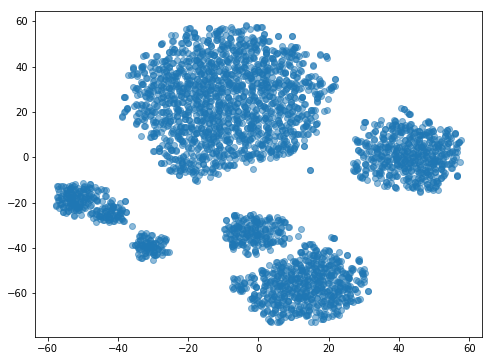

In [47]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

Let’s color this t-SNE representation according to the churn (blue for loyal customers, and orange for those who churned).

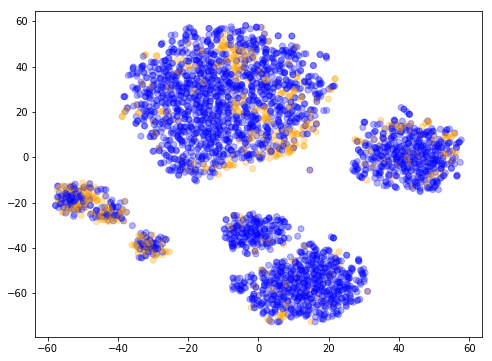

In [50]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.3);

Another way:

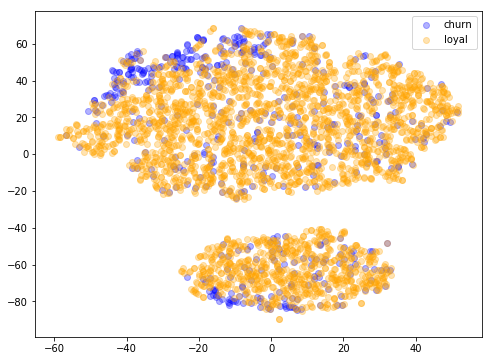

In [56]:
plt.rcParams['figure.figsize'] = (8, 6)

plt.scatter(X_repr[df['Churn'] == 1, 0], X_repr[df['Churn'] == 1, 1], alpha=0.3, c='blue', label='churn')
plt.scatter(X_repr[df['Churn'] == 0, 0], X_repr[df['Churn'] == 0, 1], alpha=0.3, c='orange', label='loyal')
plt.legend()

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

To better understand the picture, we can also color it with the remaining binary features: International Plan and Voicemail. Orange dots here indicate instances that are positive for the corresponding binary feature.

In [47]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


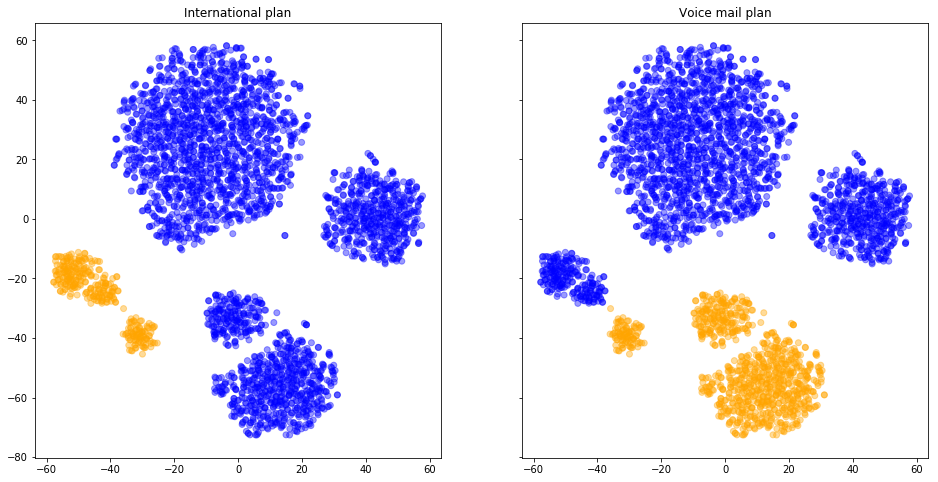

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({1: 'orange', 0: 'blue'}), alpha=0.4)
    axes[i].set_title(name)

Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in the most south-west cluster that represents the people with the international plan but no voice mail.

Finally, let’s note some disadvantages of t-SNE:

- High computational complexity. The implementation in scikit-learn is unlikely to be feasible in a real task. If you have a large number of samples, you should try Multicore-TSNE instead.


- The plot can change a great deal depending on the random seed, which complicates interpretation. [Here](http://distill.pub/2016/misread-tsne/) is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

### Exploring features one at a time

#### Numeric

In [21]:
df['Total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

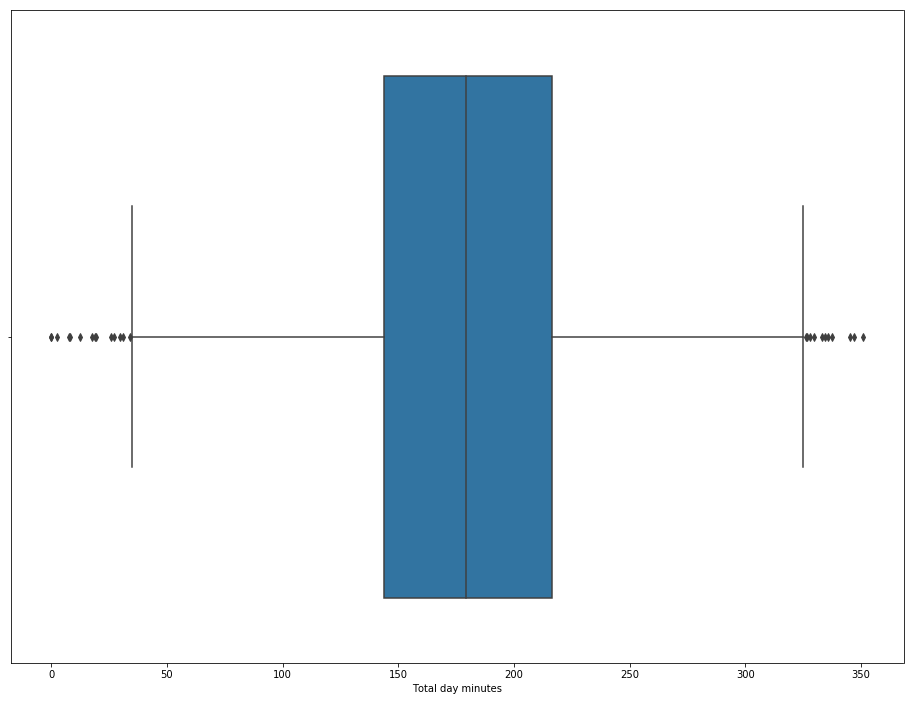

In [22]:
sns.boxplot(x='Total day minutes', data=df)

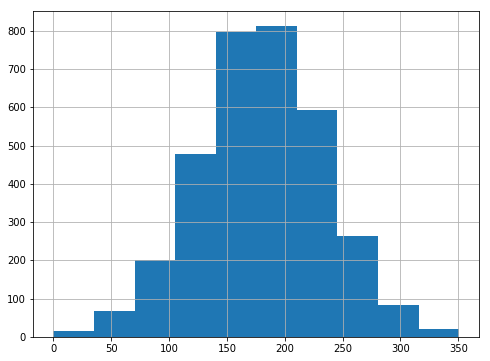

In [23]:
plt.rcParams['figure.figsize'] = (8,6)

df['Total day minutes'].hist()

#### Categorical

In [24]:
df['State'].nunique()

51

In [25]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [26]:
df['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

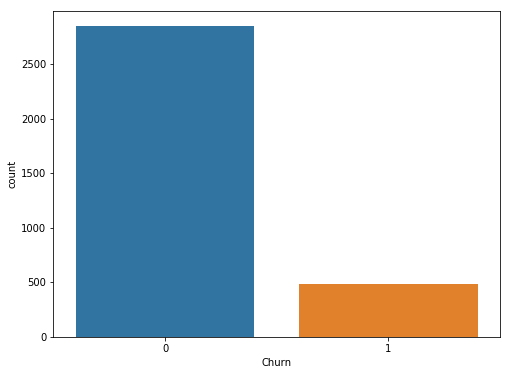

In [27]:
sns.countplot(x='Churn', data=df)

### Interaction bw features

#### Numeric - numeric

These plots are v helpful when we plot it agains a target var. But here our target var is not num



Withou plot: Compute Correlations 

In [28]:
df.corrwith(df['Total day minutes'])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

Plot: Scatter Plot

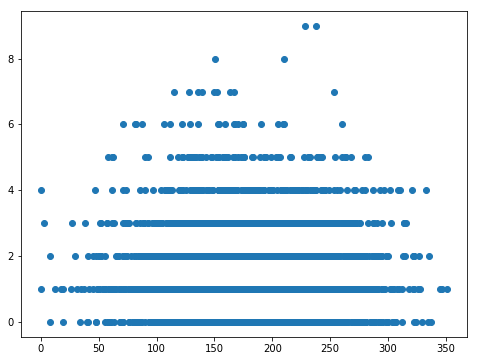

In [29]:
plt.scatter(df['Total day minutes'], df['Customer service calls'])

#### Categorical - categorical interactions

Without plot: Use crosstab

In [37]:
pd.crosstab(df['Churn'], df['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


Visualize: Bar Chart

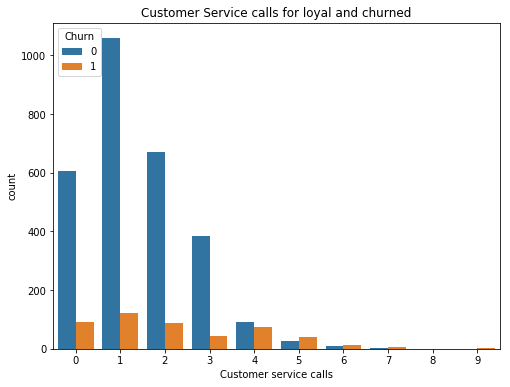

In [38]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.title("Customer Service calls for loyal and churned");

the ';' prevents jupyter printing out the output text

With many service calls people start to churn

Starting from 4 service calls, the effect of churn really increases



### Categoric - numeric

Without plotting: group by and apply

In [57]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].mean()

,Total day minutes,Customer service calls
Churn,,
0,175.175754,1.449825
1,206.914079,2.229814


In [58]:
import numpy as np

In [59]:
df.groupby('Churn')['Total day minutes', 'Customer service calls'].agg([np.mean, np.median, np.std])

Total day minutes                   Customer service calls         \
                   mean median        std                   mean median   
Churn                                                                     
0            175.175754  177.2  50.181655               1.449825      1   
1            206.914079  217.6  68.997792               2.229814      2   

                 
            std  
Churn            
0      1.163883  
1      1.853275

Visualization: Boxplot

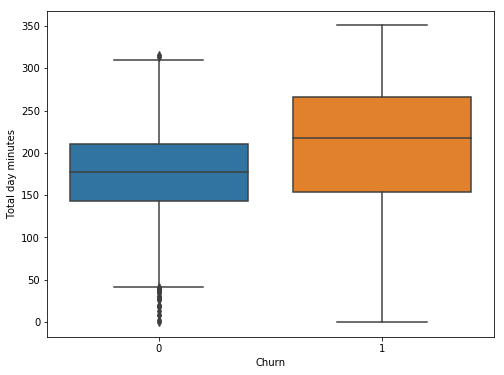

In [61]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);